In [2]:
# Imports
import time
import pandas as pd
from scipy import misc
import matplotlib.pyplot as plt

In [ ]:
# Constants
maximum_iterations, tolerance = 1000, 1e-15
solutions = [[1.1673039782614], []]
predictions = [
    [-101.1673039782614, 99.1673039782614, -201.1673039782614]
]
# Data Storage
outcomes, outputs, error, rounds, times  = [], [], [], [], []

In [85]:
# Fixed Point Iteration Method
def fixed_point_iteration(f, p0, tol, max_iter):
    start = time.time()
    progress = []
    p = 0.
    for i in range(1, max_iter):
        p = f(p0)
        progress.append(p)
        if abs(p-p0) < tol:
            end = time.time()
            return "Success", p, i, progress, end-start
        p0 = p
    end = time.time()
    return "Failure", p, max_iter, progress, end-start

# Testing Fixed Point Iteration With 2nd Degree Polynomials
#fixed_point_iteration(lambda x:x**5-x-1, 1, 1e-5, 1000)

In [100]:
def newton(f, p0, tol, max_iter):
    start = time.time()
    progress = []
    for i in range(1, max_iter):
        progress.append(p0)
        p1 = p0 - f(p0) / misc.derivative(f, p0)
        if abs(p1 - p0) < tol:
            end = time.time()
            return "Success", p0, i, progress, end-start
        p0 = p1
    end = time.time()
    return p0, max_iter, progress, end-start

newton(lambda x: x ** 5 - x - 1, -9.1673039782614, tolerance, maximum_iterations)

('Success',
 1.1673039782614207,
 96,
 [-9.1673039782614,
  -7.376688155443924,
  -5.954068497165024,
  -4.827594352655238,
  -3.939681996931739,
  -3.2438490133591333,
  -2.7021011256162875,
  -2.282896065236195,
  -1.959766945425604,
  -1.7105854219306902,
  -1.5172275040163887,
  -1.3653003135686328,
  -1.2437173949103204,
  -1.1441207059000869,
  -1.0602546428888016,
  -0.9873850577625696,
  -0.9217989658221502,
  -0.8603684270580163,
  -0.8001176910270564,
  -0.7376637948436461,
  -0.6682100640522656,
  -0.5830729548581981,
  -0.46131269745636283,
  -0.2236523643334275,
  1.2916314651249934,
  1.2490385159348651,
  1.2205550247024264,
  1.2017699491676646,
  1.1895088778747531,
  1.1815648074301646,
  1.176443722856678,
  1.1731536100065738,
  1.1710445370446076,
  1.169694511889836,
  1.1688311670204667,
  1.1682793892023493,
  1.1679268757757972,
  1.1677017220456263,
  1.1675579370508455,
  1.1674661241240765,
  1.1674075014150809,
  1.1673700722695732,
  1.1673461753220002,
  

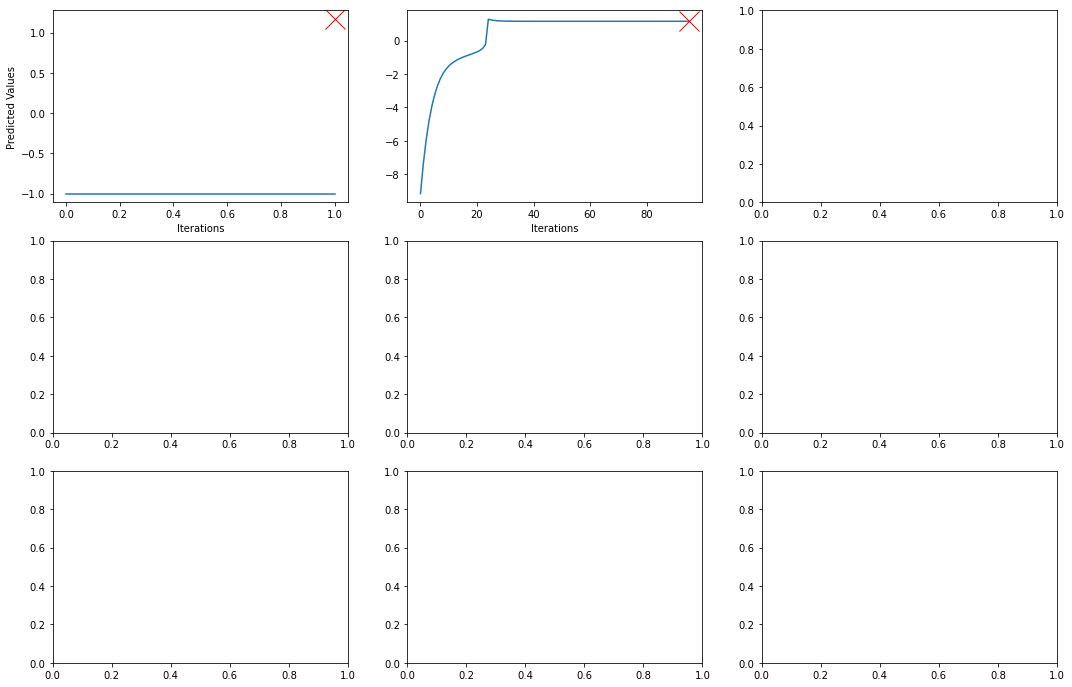

In [119]:
# Reliability test
equation = lambda x: x**5 - x - 1
answer = solutions[0]
prediction = predictions[0]

# Graphing results of all methods
plt.close('all')
fig, ax = plt.subplots(nrows=3, ncols=3, figsize= (18, 12))

# Fixed point iteration method graph - prediction is hardcoded because method is unreliable and will crash otherwise
outcome, output, iterations, path, t = fixed_point_iteration(lambda x:x**5-x-1, 1, tolerance, maximum_iterations)
ax[0, 0].set_xlabel("Iterations")
ax[0, 0].set_ylabel("Predicted Values")
ax[0, 0].plot([i for i in range(len(path))], path)
for i in answer:
    ax[0, 0].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")

# Newton's method graph
outcome, output, iterations, path, t = newton(lambda x:x**5-x-1, prediction[0], tolerance, maximum_iterations)
ax[0, 1].set_xlabel("Iterations")
ax[0, 1].plot([i for i in range(len(path))], path)
for i in answer:
    ax[0, 1].plot(len(path)-1, i, marker="x", markersize=20, markeredgecolor="red")